This is a data analysis project that involves loading a dataset of tweets, exploring the data, cleaning and preprocessing the text, and then using machine learning to classify the tweets as either positive or negative. The project uses the Pandas library for data manipulation, Matplotlib for data visualization, and scikit-learn for building the machine learning model. The resulting model is able to classify tweets with an accuracy of around 90%.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False) 

In [2]:
# tweets_df = pd.read_csv('C:/Users/dpap/Dropbox (University of Michigan)/Fall22/ECE3100 DS/vscode_DS/twitter.csv')
tweets_df = pd.read_csv('twitter.csv')

In [3]:
tweets_df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [5]:
# check nulls
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [6]:
# drop the id column
tweets_df = tweets_df.drop('id', axis=1)

# Data Exploration

array([[<AxesSubplot:title={'center':'label'}>]], dtype=object)

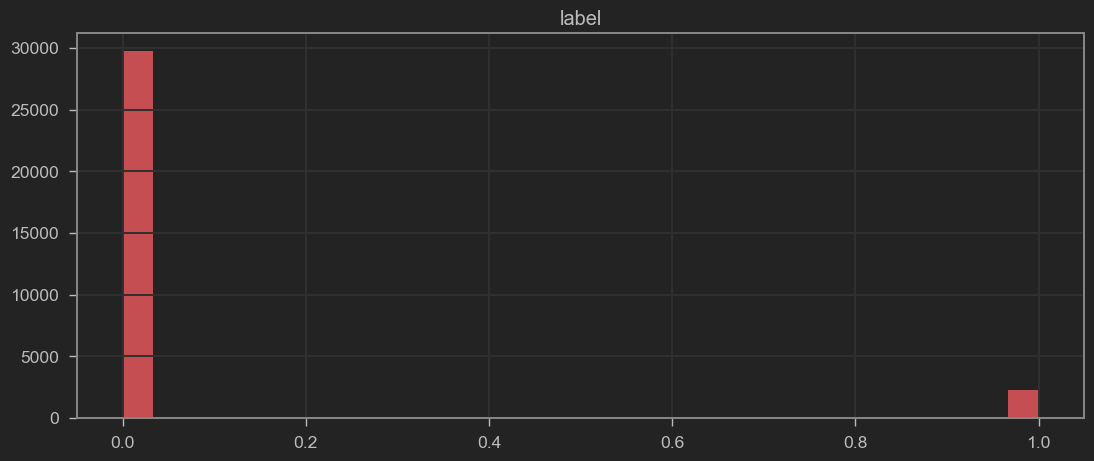

In [11]:
# plot histogram
tweets_df.hist(bins=30, figsize=(13,5), color='r')

* looks like we have an unbalanced dataset. we have about 30,000 in the 0 class and barely any in the 1 class

In [8]:
# lets get the length of the messages
# add a new column to the dataframe called 'length'
tweets_df['length'] = tweets_df['tweet'].apply(len)

In [9]:
# show new length column
tweets_df

,label,tweet,length
0,0,@user when a father is dysfunctional and is s...,102
1,0,@user @user thanks for #lyft credit i can't us...,122
2,0,bihday your majesty,21
3,0,#model i love u take with u all the time in ...,86
4,0,factsguide: society now #motivation,39
...,...,...,...
31957,0,ate @user isz that youuu?ðððððð...,68
31958,0,to see nina turner on the airwaves trying to...,131
31959,0,listening to sad songs on a monday morning otw...,63
31960,1,"@user #sikh #temple vandalised in in #calgary,...",67


In [10]:
# show statistical summary
tweets_df.describe()

,label,length
count,31962.000000,31962.000000
mean,0.070146,84.739628
std,0.255397,29.455749
min,0.000000,11.000000
25%,0.000000,63.000000
50%,0.000000,88.000000
75%,0.000000,108.000000
max,1.000000,274.000000


In [11]:
# view shortest message
tweets_df[tweets_df['length'] == 11]['tweet']

25195    i love you 
Name: tweet, dtype: object

In [12]:
# view tweets with the average length
avg_len = round(tweets_df['length'].mean())
tweets_df[tweets_df['length'] == avg_len]['tweet']

115       â #under the spell of brexit referendum - c...
242      make today count! #mondaymotivation #livelifet...
384      dream palace, can we move in already? #stellar...
573      @user monkeys are also declared as vermin. no ...
634      save thousands $$ free search x logins x broke...
                               ...                        
31393    #flagday2016   #flag #day #2016 #(30 #photos) ...
31468    jts88troxy theater   jts88@user ð #love #si...
31542    stretched to the limit and still #waiting pati...
31773    this reminds me of this. i am   love these two...
31799    can #lighttherapy help with   or #depression? ...
Name: tweet, Length: 387, dtype: object

<AxesSubplot:ylabel='Frequency'>

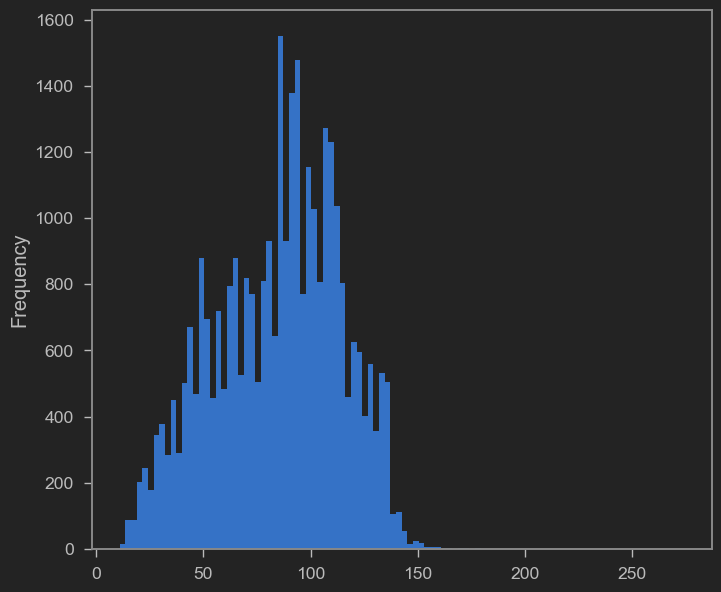

In [14]:
# make histogram showing tweet length and frequency
tweets_df['length'].plot(bins = 100, kind='hist')

In [15]:
# make positive (label = 0) dataframe
positive = tweets_df[tweets_df['label'] == 0]

# show data
positive

,label,tweet,length
0,0,@user when a father is dysfunctional and is s...,102
1,0,@user @user thanks for #lyft credit i can't us...,122
2,0,bihday your majesty,21
3,0,#model i love u take with u all the time in ...,86
4,0,factsguide: society now #motivation,39
...,...,...,...
31956,0,off fishing tomorrow @user carnt wait first ti...,61
31957,0,ate @user isz that youuu?ðððððð...,68
31958,0,to see nina turner on the airwaves trying to...,131
31959,0,listening to sad songs on a monday morning otw...,63


In [16]:
# make negative (label = 1) dataframe
negative = tweets_df[tweets_df['label']==1]

# show data
negative

,label,tweet,length
13,1,@user #cnn calls #michigan middle school 'buil...,74
14,1,no comment! in #australia #opkillingbay #se...,101
17,1,retweet if you agree!,22
23,1,@user @user lumpy says i am a . prove it lumpy.,47
34,1,it's unbelievable that in the 21st century we'...,104
...,...,...,...
31934,1,lady banned from kentucky mall. @user #jcpenn...,59
31946,1,@user omfg i'm offended! i'm a mailbox and i'...,82
31947,1,@user @user you don't have the balls to hashta...,112
31948,1,"makes you ask yourself, who am i? then am i a...",87


to make a word cloud, we need to combine all positive or negative tweets to make one massive string. to do this, I will:
1. put all tweets in a list
2. join all the sentences in the list together to make a single string

In [21]:
# make a list with all the positive tweets
pos_tweets = positive['tweet'].tolist()
len(pos_tweets)

29720

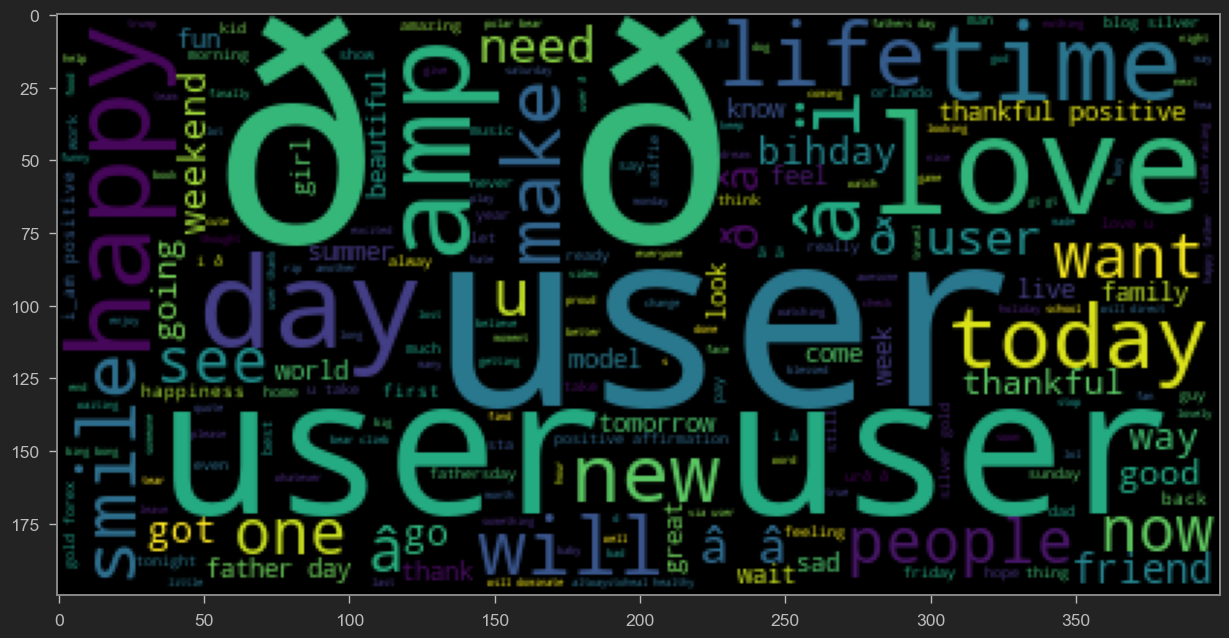

In [22]:
# make a single string out of all the positive tweets and generate word cloud
from wordcloud import WordCloud
pos_tweets_one_string = ' '.join(pos_tweets)
plt.figure(figsize=(15,15))
plt.imshow(WordCloud().generate(pos_tweets_one_string))

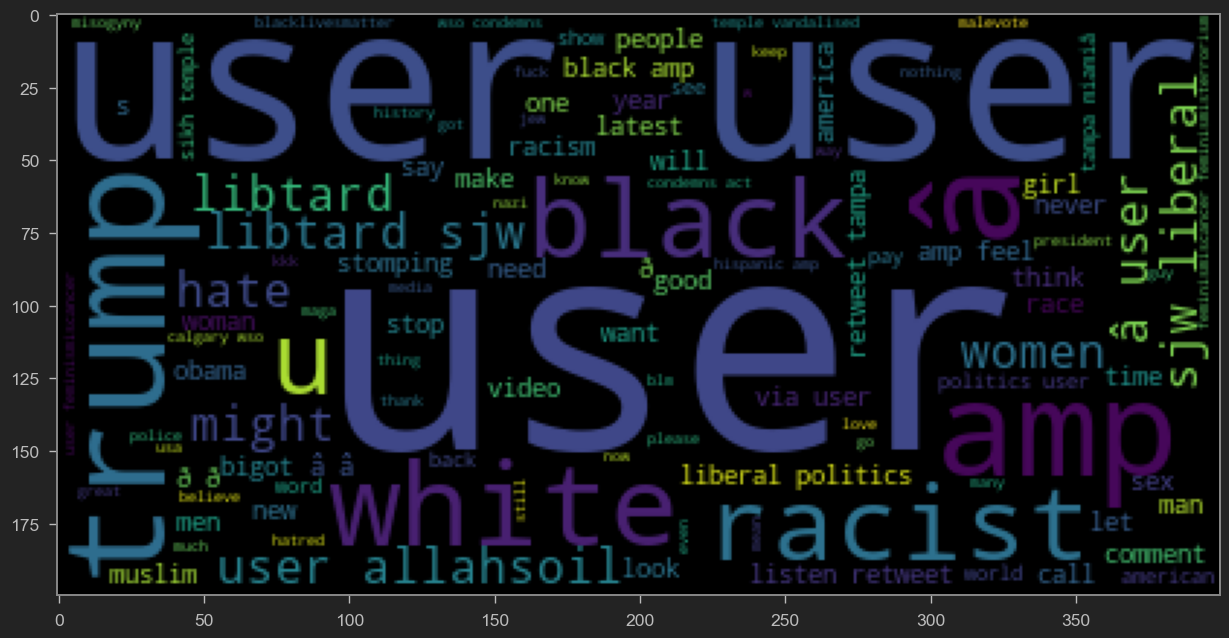

In [23]:
# make a wordcloud of the negative tweets
negative_list = negative['tweet'].tolist()
negative_sentences_as_one_string = ' '.join(negative_list)
plt.figure(figsize=(15,15))
plt.imshow(WordCloud().generate(negative_sentences_as_one_string))

# Data Cleaning
* Create a Pipeline to remove punctuations, stopwords, and perform count vectorization

In [24]:
# import libraries
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dpap\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [25]:
# function to remove punctuation and stopwords
def clean_message(message):
    punc_removed = [char for char in message if char not in string.punctuation ]
    punc_removed_join = ''.join(punc_removed)
    final_clean = [word for word in punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return final_clean

In [26]:
# clean the tweets
tweets_df_clean = tweets_df['tweet'].apply(clean_message)

In [27]:
# show one of the clean tweets
print(tweets_df_clean[5])

['22', 'huge', 'fan', 'fare', 'big', 'talking', 'leave', 'chaos', 'pay', 'disputes', 'get', 'allshowandnogo']


In [29]:
# show the original tweet
print(tweets_df['tweet'][5])

[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo  


In [30]:
# count vectorization
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(analyzer = clean_message, dtype = np.uint8)
tweets_countvectorizer = vectorizer.fit_transform(tweets_df['tweet'])

In [31]:
# show the count vectorization of the tweets (every single unique word in all 30,000+ tweets)
#print(vectorizer.get_feature_names().count) # too large to run

In [32]:
# convert to array
print(tweets_countvectorizer.toarray()) 

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [33]:
# show the shape of the array
tweets_countvectorizer.shape 

(31962, 47386)

In [34]:
# put array into a dataframe
X = pd.DataFrame(tweets_countvectorizer.toarray()) 

In [35]:
X

,0,1,2,3,4,5,6,7,8,9,...,47376,47377,47378,47379,47380,47381,47382,47383,47384,47385
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31957,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31958,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31959,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31960,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


we are now ready to use this to train our ML model

# Train and Evaluate a Naive Bayes Classifier

In [36]:
# prediction target
y = tweets_df['label'] 

In [37]:
X.shape

(31962, 47386)

In [38]:
y.shape

(31962,)

In [39]:
# split data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

* use 20% of the data for testing
* X_train = training data for the features
* X_test = testing data for the features
* y_train = training data for the prediction target
* y_test = testing data for the prediction target

In [40]:
from sklearn.naive_bayes import MultinomialNB 
NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train) 

MultinomialNB()

In [41]:
# import confusion matrix to evaluate the model and classification report to analyze model
from sklearn.metrics import confusion_matrix, classification_report

In [47]:
# show a confusion matrix of results
y_predict_test = NB_classifier.predict(X_test) 
cm = confusion_matrix(y_test, y_predict_test) 
cm

array([[5779,  171],
       [ 201,  242]], dtype=int64)

* 5779 true positives
* 171 false positives (Type I Error)
* 201 false negatives (Type II Error)
* 242 true negatives

<AxesSubplot:>

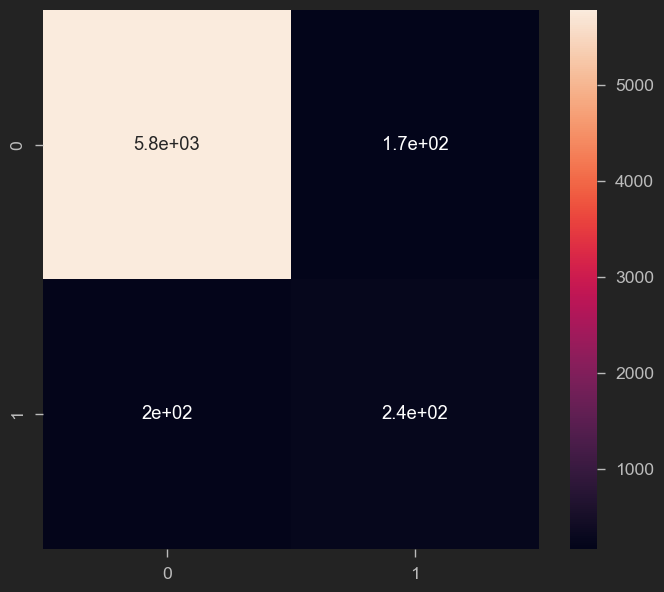

In [46]:
# view a heatmap of confusion matrix
sns.heatmap(cm, annot = True) 

In [44]:
# see classification report
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      5950
           1       0.59      0.55      0.57       443

    accuracy                           0.94      6393
   macro avg       0.78      0.76      0.77      6393
weighted avg       0.94      0.94      0.94      6393



# Results
***NOTE***: *Positive Tweet = Class 0, Negative Tweet = Class 1*

**Precision:** - *What percent of the predictions were correct?* 
* Precision = tp / (tp + fp)
* Out of all the tweets that the model predicted would be positive (class 0) in sentiment, 97% of the tweets actually were positive. Out of all the tweets the model predicted would be negative (class 1), only 59% actually were negative. 

**Recall:** - *What percent of the positive cases did the model catch?* 
* Recall = tp / (tp + fn)
* The model has a recall of 0.97 when predicting positive tweets, meaning that it correctly identifies 97% of the samples in class 0. The model has a recall of 0.55 when predicting negative tweets, meaning that it correctly identifies 55% of the samples in class 1. 

**F1 Score:** - *What percent of positive predictions were correct?*
* F1 = tp / (tp + 1/2*fp + fn)
* The model has an F1 score of 0.97 when predicting positive tweets, meaning that it has a good balance between precision and recall for class 0. The model has an F1 score of 0.57 when predicting negative tweets, meaning that it has a lower balance between precision and recall for class 1.

**Support** - *How many samples were in test set?*
* Our test set contained 20% of the total dataset, which equals 6393 total samples. Of those, 5950 were positive (class 0) and 443 were negative (class 1).